<a href="https://colab.research.google.com/github/jmuzquiz/ABTestingProject/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the data
df = pd.read_csv("marketing_AB.csv")

In [3]:
#check first few observations
df.head()
#unnamed:0 column will not be useful as a predictor, essentially index number
#user id can be used to check if the records are unique

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
#check if we have duplicates with respect to user id
num_duplicates = df.duplicated(subset = 'user id').sum()

print(f'Number of duplicate user ids: {num_duplicates}')
#all user ids are unique so we don't need that column either

Number of duplicate user ids: 0


In [7]:
#check for missing values
any_missing = df.isnull().values.any()

print(f'Are there any missing values in the DataFrame? {any_missing}')


Are there any missing values in the DataFrame? False


In [6]:
#drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)
#axis = 1 means operation performed on columns (0 is rows)
#inplace = true means modifying data frame directly, not making a new one

In [7]:
df.columns
#total ads is only actual numerical column
#most adds hour is more time hour (20 = 20/24 = 8pm)

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
#descriptive statistics
#for numerical do-
print(df['total ads'].describe())
#this is done later


count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64


In [10]:
#descriptive stats
#for categorical do-
print(df_cat.value_counts()) #ehh better just to do visualization

test group  converted  most ads day  most ads hour
ad          False      Friday        13               7000
                       Sunday        14               6841
                       Friday        12               6813
                                     11               6803
                       Wednesday     12               6760
                                                      ... 
            True       Wednesday     3                   1
psa         True       Friday        8                   1
                                     7                   1
ad          True       Tuesday       5                   1
psa         True       Tuesday       23                  1
Name: count, Length: 606, dtype: int64


In [9]:
#check if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()
#2 test groups, true/false whether they converted,
#7 days of week, 24 hours

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [9]:
#check if categorical variables have appropriately defined levels
for i in df_cat.columns:
  print(i.upper(), ":", df_cat[i].unique()) #gets us column names and the unique values
#0 to 23 is 24 hours

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


**Univariate Analysis**

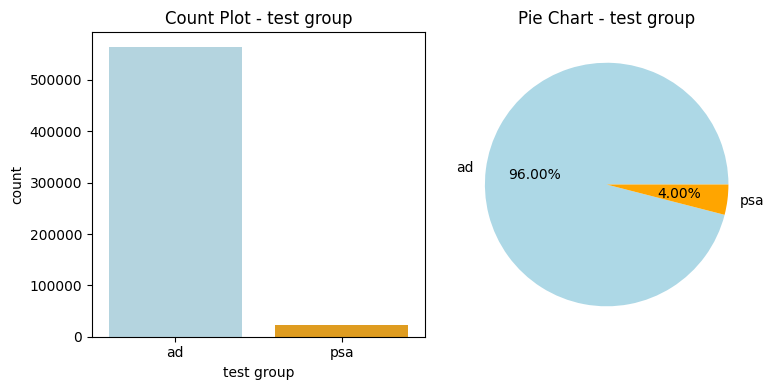

In [10]:
variable = 'test group' #which column in df_cat to visualize

#define the custom color palette
custom_palette = {'psa': 'orange', 'ad': '#add8e6'} #light blue color code

plt.figure(figsize = (8,4))

#count plot
plt.subplot (1,2,1) #1 row, 2 col, 1st plot
sns.countplot(x=variable, data=df_cat, palette = custom_palette)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counts of each unique variable in column we are visualizing
colors = [custom_palette[label] for label in counts.index]
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors = colors) #percentage with 2 decimal places
plt.title(f'Pie Chart - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

#4% ppl shown psa
#96% shown ad

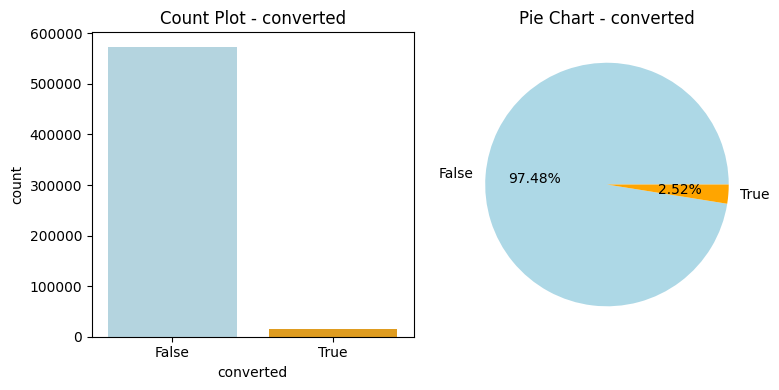

In [11]:
variable = 'converted' #which column in df_cat to visualize

#ensure the values in 'converted' are strings, as the custom palette keys are strings
df_cat[variable] = df_cat[variable].astype(str)

#define the custom color palette
custom_palette = {'True': 'orange', 'False': '#add8e6'} #light blue color code

plt.figure(figsize = (8,4))

#count plot
plt.subplot (1,2,1) #1 row, 2 col, 1st plot
sns.countplot(x=variable, data=df_cat, palette = custom_palette)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counts of each unique variable in column we are visualizing
colors = [custom_palette[label] for label in counts.index]
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors = colors) #percentage with 2 decimal places
plt.title(f'Pie Chart - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

#column is skewed again
#2.52% converted (bought product)
#97.48% did not convert (did not buy)

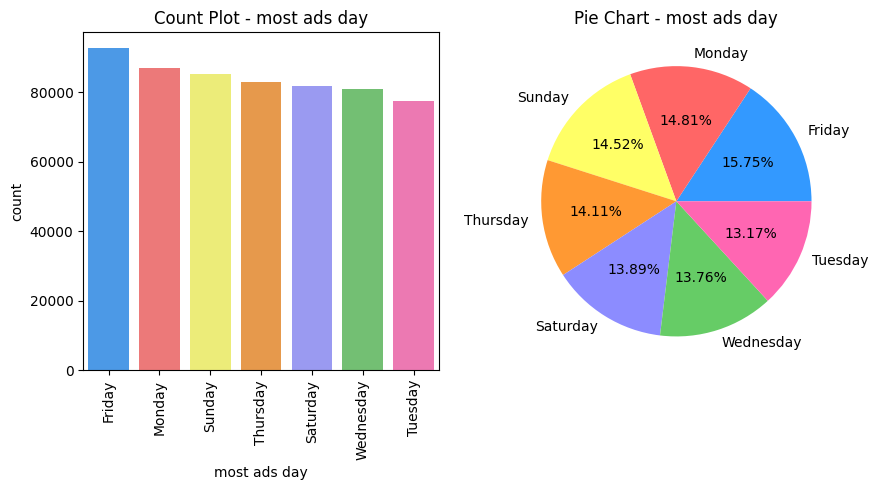

In [12]:
variable = 'most ads day' #which column in df_cat to visualize

#define the custom color palette
custom_palette = {
    'Monday': '#FF6666',    # Red
    'Tuesday': '#FF66B2',   # Pink
    'Wednesday': '#66CC66', # Green
    'Thursday': '#FF9933',  # Orange
    'Friday': '#3399FF',    # Blue
    'Saturday': '#8C8CFF',  # Purple
    'Sunday': '#FFFF66'     # Yellow
}

plt.figure(figsize = (9,5))

#count plot
plt.subplot (1,2,1) #1 row, 2 col, 1st plot
sns.countplot(x=variable, data=df_cat, palette= custom_palette,
              order = df_cat['most ads day'].value_counts().index) #highest to lowest
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90) #rotate day names for easier reading

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counts of each unique variable in column we are visualizing
colors = [custom_palette[label] for label in counts.index]
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors = colors) #percentage with 2 decimal places
plt.title(f'Pie Chart - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

#friday is the day most ads were shown, but fairly evenly distributed

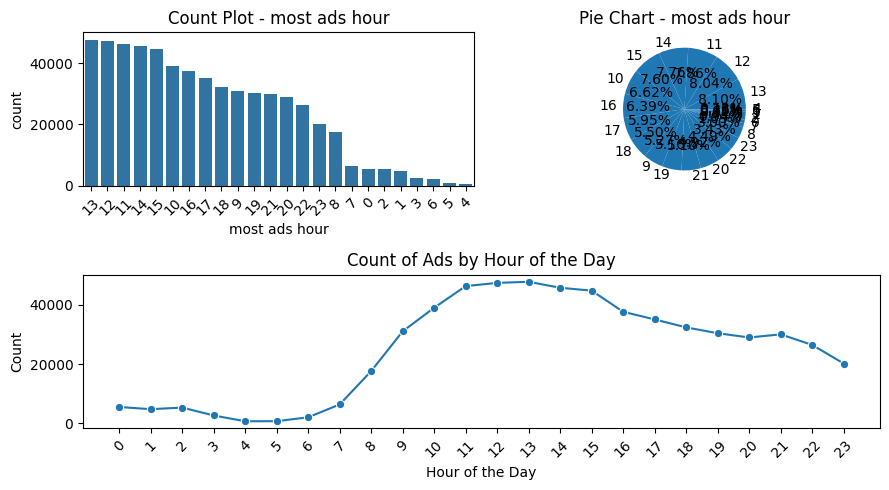

In [14]:
variable = 'most ads hour' #which column in df_cat to visualize

#define the custom color palette (adjust as needed)
custom_palette = ['#1f77b4'] * 24  # Using a single color for all bars

plt.figure(figsize = (9,5)) #12,6

#count plot
plt.subplot (2,2,1) #2 rows, 2 cols, 1st plot in 2x2, top left
sns.countplot(x=variable, data=df_cat, palette= custom_palette,
              order = df_cat['most ads hour'].value_counts().index) #highest to lowest
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 45) #rotate day names for easier reading

#pie chart
plt.subplot(2,2,2)
counts = df_cat[variable].value_counts() #counts of each unique variable in column we are visualizing
colors = [custom_palette[label] for label in counts.index]
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors = colors) #percentage with 2 decimal places
plt.title(f'Pie Chart - {variable}')

#line plot
plt.subplot (2,1,2) #2 rows, 1 column in, 2 (bottom row)
sns.lineplot(x=range(24), y=df_cat.groupby(variable).size(), marker='o', color='#1f77b4')
plt.title(f'Count of Ads by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
# Customize x-axis ticks and labels
plt.xticks(range(24), labels=[str(i) for i in range(24)], rotation=45)

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

#13 is 1pm is top hour ads are shown, least is 4am
#pie chart useless

#maybe edit names of plots before putting into readme file**

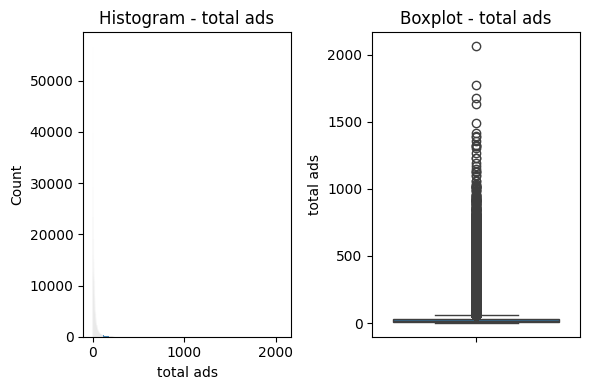

In [15]:
variable = 'total ads' #the only numerical variable

plt.figure(figsize = (6,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

#pie chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df)
plt.title(f'Boxplot - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

In [16]:
#plot above looks bad
#so let's check the descriptive stats of this feature
df['total ads'].describe()
#lots of outliers let's go with total ads less than 50
#because close to 75% percentile value

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

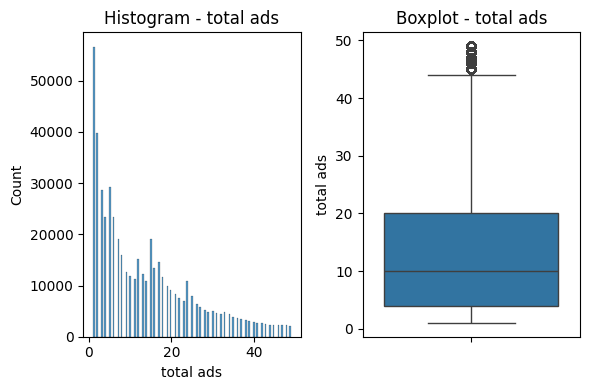

In [17]:
variable = 'total ads' #the only numerical variable

plt.figure(figsize = (6,4))

#histogram
plt.subplot(1,2,1)
#filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title(f'Histogram - {variable}')

#pie chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data=df[df['total ads']<50])
plt.title(f'Boxplot - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

#median around 10 ads

**Bivariate Analysis**

In [18]:
#we will be pairing everything with the target column which is converted
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [19]:
#comparing two categorical variables
#also normalized them
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group
#of people who have seen ad, 2.55% have purchased
#of people who have seen only the psa, only 1.78% have purchased

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


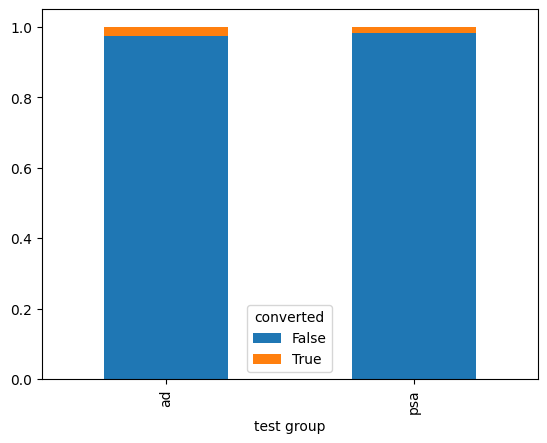

In [20]:
#visualizing above
ct_conversion_test_group.plot.bar(stacked = True);
#orange band of ad is slightly larger than orange of psa

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


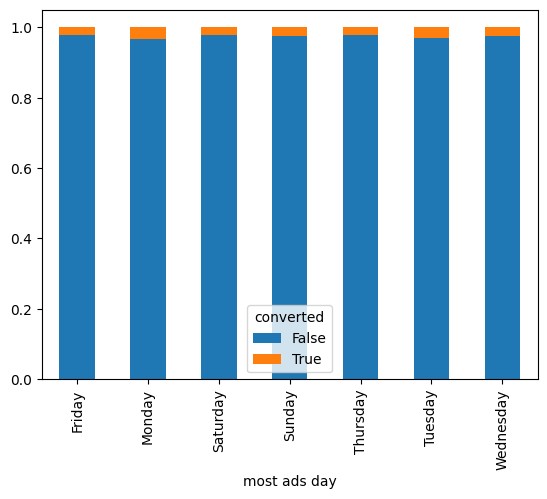

In [23]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);
#monday has maximum conversions at 3.28%
#maybe visualize these better somewhere


converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


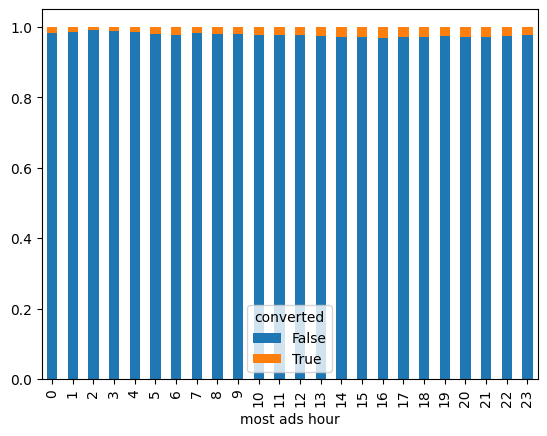

In [26]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);
#conversion rate maximum is at 4pm
#different from early when we saw hour maximum ads shown

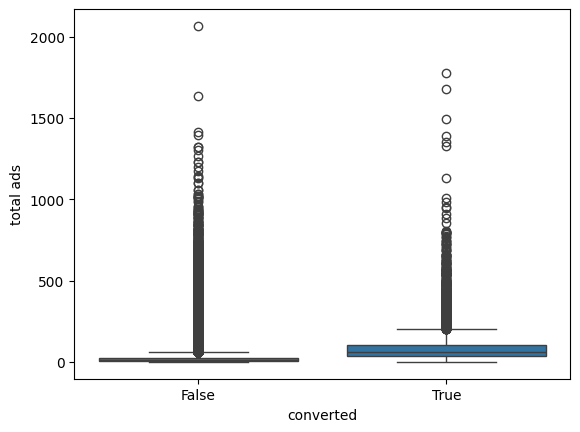

In [27]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);

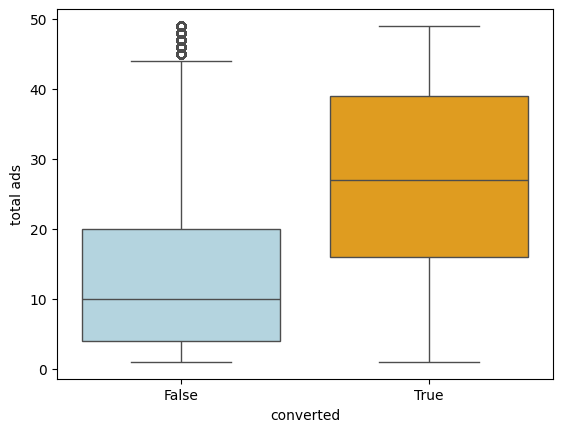

In [30]:
#reduced interval for closer visualization
#above was very skewed again

#define the custom color palette
custom_palette = {'True': 'orange', 'False': '#add8e6'}  # Light blue color code
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads']<50], palette = custom_palette);
#people who have purchased, median number ads they have seen is around 25
#people who have not purchased, median is around 10
#repeated targetting seems to be helping

#maybe change colors lol, for above boxplot too

**Statistical Tests**

In [31]:
#chi-squares test of dependence to assess relationship
#between categorical variables and conversion status
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted': #don't want to see converted relationship with itself
    #create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

    #perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #display the results
    print(f"\nChi-squared test for {variable} vs. converted:")
    print(f"Chi-squared value: {chi2}")
    print(f"p-value: {p}")

    #check for significance
    if p < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significant.")
    else:
      print(f"There is no significant difference in covnersion rates across {variable}.")

    #showing the ad makes a difference
    #what day and what hour you show ad also makes a difference


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates acrosss test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates acrosss most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates acrosss most ads hour is statistically significant.


In [32]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [33]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#step 1: check assumptions
#normality assumption
#normality needs to be checked by sample, variable(which is total ads) sample of those who converted, and sample of those who did not
#getting the test stats and the p values
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#equality of variances assumption
#compare the 2 samples
#this is another way to write it, tilde represents not?
#getting a stat and a p value again
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

#none of the assumptions are satisfied

Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [34]:
#perform one of these tests to compare the distributions of a continous variable
#between its two groups

#step 2: perform a suitable test
alpha = 0.5

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #assumptions met - use t-test for means
  t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
  #assumptions not met - use Mann-Whitney U test for medians (nonparametric)
  u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"Mann-Whitney U test: p-value = {u_p_value}")

#this suggests that when it comes to the conversion of people,
#it does make a difference what the median amount of total ads that they have seen is

Mann-Whitney U test: p-value = 0.0
